<a href="https://colab.research.google.com/github/ewerton-andrade/DataScienceEvolution/blob/main/Finding_Bronken_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados do aluno**
# - **Aluno**: Ewerton Lima de Andrade
# - **email**: etonandrade@gmail.com
# - **acesse esse notebook colab no github**: https://github.com/ewerton-andrade/DataScienceEvolution/blob/main/PCA_Defective_Machine.ipynb
# - **Assunto**: "I2A2 - ABDI -Challenge 1"

******************

# **Objetivo**: Aqui irei resolver o problema proposto utilizando python com as bibliotecas referentes à análise de dados como o pandas, numpy, sklearn e matplotlib para os gráficos.

***

# **Resumo do problema**: Dados de sensores de 8 máquinas são extraídos. Após uma análise dos dados deve-se chegar à conclusão de qual máquina está com um possível defeito. Parto de duas premissas:
#1- As máquinas são semelhantes;
#2- Existe pelo menos uma delas que está com defeito;

***

# **Início**

# Esses são os dados extraídos dos sensores em cada máquina:

In [ ]:
from google.colab import files
uploaded = files.upload() #xlsx upload

In [89]:
import pandas as pd
#Read and transform data into data frame
file_name = "Defective_Equipment(rev 2024-02-21).xlsx"
df = pd.read_excel(file_name)
markdown_table = df.to_markdown(index=False)
print(markdown_table)

|   Seq |   V1 |   V2 |   V3 |   V4 |   V5 |   V6 |   V7 |   V8 |
|------:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     1 |  375 |  475 |  135 |  458 |  509 |  469 |  336 |  492 |
|     2 |   57 |   73 |   47 |   53 |   63 |   63 |   62 |   58 |
|     3 |  245 |  227 |  267 |  242 |  271 |  268 |  219 |  286 |
|     4 | 1472 | 1582 | 1494 | 1462 | 1613 | 1490 | 1323 | 1493 |
|     5 |  105 |  103 |   66 |  103 |  118 |  101 |   98 |  118 |
|     6 |   54 |   64 |   41 |   62 |   55 |   63 |   59 |   59 |
|     7 |  193 |  235 |  209 |  184 |  207 |  223 |  172 |  156 |
|     8 |  147 |  160 |   93 |  122 |  139 |  152 |  130 |  101 |
|     9 | 1102 | 1137 |  674 |  957 | 1058 | 1098 |  990 |  878 |
|    10 |  720 |  874 | 1033 |  566 |  628 |  706 |  646 |  320 |
|    11 |  253 |  265 |  143 |  171 |  193 |  247 |  226 |   99 |
|    12 |  685 |  803 |  586 |  750 |  830 |  699 |  615 |  777 |
|    13 |  488 |  570 |  355 |  418 |  465 |  467 |  437 |  313 |
|    14 | 

#Acima temos os dados de 17 sensores obtidos de 8 máquinas sob as mesmas condições e considerando o fato de que os sensores estão em perfeita condição.

# Essa análise será realizada utilizando o pca.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Aqui os dados do dataframe precisam ser tratados para adaptar à análise realizada:
# - A coluna 'Seq' será retirada do dataframe;
# - A matriz será transposta, uma vez que queremos descobrir qual máquina está com defeito baseada nos dados dos sensores;
# - Uma label será criada para futura identificação no gráfico;

In [84]:
#Data Transform and cleaning
df.drop('Seq', axis=1, inplace=True)
df = df.transpose() #transpose the dataframe
df.reset_index(drop=True, inplace=True) #reset index

#Adding a label line
machine_labels = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
df['line'] = machine_labels

# Separating data into features and labels
X = df.drop('line', axis=1)
labels = df['line']

# Define colors for each label
colors = {
    'V1': 'red',
    'V2': 'green',
    'V3': 'blue',
    'V4': 'grey',
    'V5': 'cyan',
    'V6': 'magenta',
    'V7': 'yellow',
    'V8': 'black',
}

# Em uma pré-análise, podemos descobrir a variância dos dados explicada baseada no número de componentes do pca e saber que com duas componentes temos acima de 90% da variância explicada conforme o gráfico abaixo:

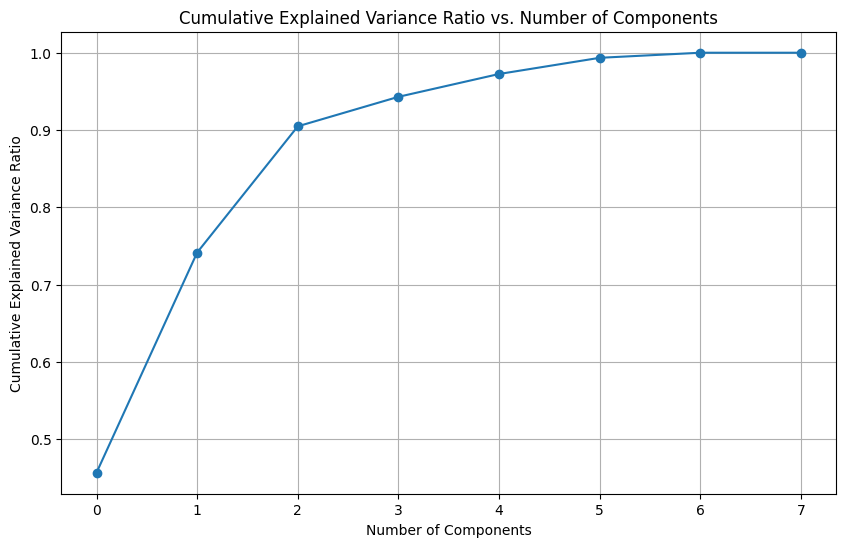

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_data)

# Plot explained variance ratio for each number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Aqui é aplicado o pca para 2 componentes, e também:
#- Calculadas as distâncias euclidianas para cada ponto do gráfico;
#- Separada em uma variável a maior distância (euclidiana) encontrada;

In [86]:
#PCA analysis

# Fit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Calculate Euclidean distance for each point
distances = np.linalg.norm(principal_components, axis=1)

# Find the index of the point with the highest Euclidean distance
index_highest_distance = np.argmax(distances)

# Create a DataFrame for the PCA output
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Após a análise, os dados de saída do pca são plotados e o ponto com a maior distância euclidiana é circulado:

-389.37294512662487 403.68325772219157


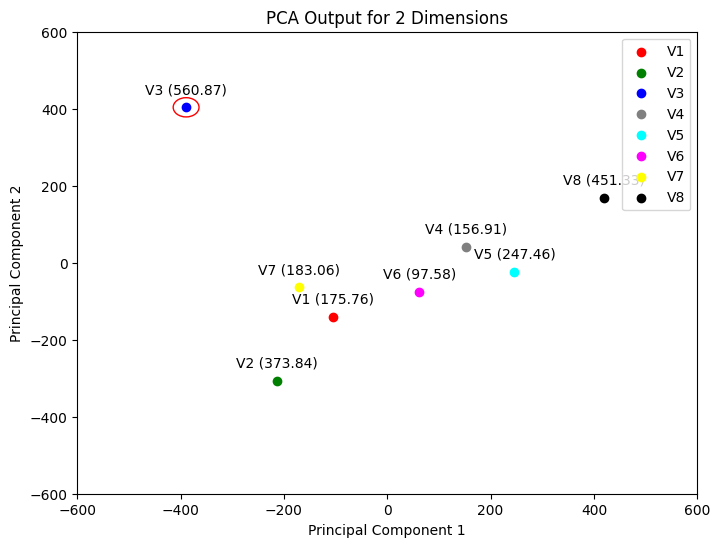

In [87]:
# Plot PCA output
plt.figure(figsize=(8, 6))
for label, color in colors.items():
  indices_to_keep = df['line'] == label
  plt.scatter(pca_df.loc[indices_to_keep, 'PC1'], pca_df.loc[indices_to_keep, 'PC2'], c=color, label=f"{label}")

# Draw a circle around the point with the highest distance
x, y = principal_components[index_highest_distance]
print(x, y)
circle = plt.Circle((x, y), 25, color='red', fill=False, linewidth=1)
plt.gca().add_patch(circle)

# Annotate scatter plot with labels and distances
for i, (x, y) in enumerate(principal_components):
    plt.annotate(f'V{i+1} ({distances[i]:.2f})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlim(-600, 600)
plt.ylim(-600, 600)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Output for 2 Dimensions')
plt.legend()
plt.show()

# **Conclusão**: A máquina que provavelmente está com problema é a que possui maior distância do centro após a pca. No caso acima conforme exibido no gráfico a máquina defeituosa é a V3.